In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import networkx as nx

In [2]:
makam_usul_counts_path = "../data/makam_usul_counts.csv"
df = pd.read_csv(makam_usul_counts_path, index_col=0)

In [3]:
df

14/4  2+2+3  3+3+3+4  Aksak  Aksak (9/4)  Aksaksemâî  \
Acem             0      0        0      0            0           0   
Acemaşîrân       0      0        0      9            0           4   
Acembûselik      0      0        0      1            1           0   
Acemkürdî        0      0        0      6            0           1   
Acemtarab        0      0        0      0            0           0   
...            ...    ...      ...    ...          ...         ...   
Şevk-ı-Cedîd     0      0        0      0            0           0   
Şevk-ı-Dil       0      0        0      0            0           0   
Şevkutarab       0      0        0      0            0           1   
Şevkâver         0      0        0      0            0           1   
Şîvenümâ         0      0        0      0            0           0   

              Aksaksemâî Evferi  Aydın  Ayîn Devr-i Revânı  Ağır Aksaksemâî  \
Acem                          0      0                   0                0   
Acemaşîrân                    0      0                   0                0   
Acembûselik                   0      0                   0                0   
Acemkürdî                     0      0                   0                1   
Acemtarab                     0      0                   0                0   
...                         ...    ...                 ...              ...   
Şevk-ı-Cedîd                  0      0                   0                0   
Şevk-ı-Dil                    0      0                   0                0   
Şevkutarab                    0      0                   0                0   
Şevkâver                      0      0                   0                0   
Şîvenümâ                      0      0                   0                0   

              ...  Âzerî Yürüksemâî  Çenber  Çenber (12/2)  Çeng-i Harbî  \
Acem          ...                 0       0              0             0   
Acemaşîrân    ...                 0       0              0             0   
Acembûselik   ...                 0       0              0             0   
Acemkürdî     ...                 0       0              0             0   
Acemtarab     ...                 0       0              0             0   
...           ...               ...     ...            ...           ...   
Şevk-ı-Cedîd  ...                 0       0              0             0   
Şevk-ı-Dil    ...                 0       0              0             0   
Şevkutarab    ...                 0       0              0             0   
Şevkâver      ...                 0       0              0             0   
Şîvenümâ      ...                 0       0              0             0   

              Çiftedüyek  Çiftesofyan  Çiftesofyan (9/16)  İki-Bir  \
Acem                   0            0                   0        0   
Acemaşîrân             0            0                   0        0   
Acembûselik            0            0                   0        0   
Acemkürdî              0            0                   0        0   
Acemtarab              0            0                   0        0   
...                  ...          ...                 ...      ...   
Şevk-ı-Cedîd           0            0                   0        0   
Şevk-ı-Dil             0            0                   0        0   
Şevkutarab             0            0                   0        0   
Şevkâver               0            0                   0        0   
Şîvenümâ               0            0                   0        0   

              İkiz Aksak  Şarkı Devr-i Revânı  
Acem                   0                    0  
Acemaşîrân             0                    0  
Acembûselik            0                    0  
Acemkürdî              0                    0  
Acemtarab              0                    0  
...                  ...                  ...  
Şevk-ı-Cedîd           0                    0  
Şevk-ı-Dil             0                    0  
Şevkutarab             0              

In [8]:
def generate_bipartite_graph(df):
    """
    Generates a bipartite graph from the given dataframe.
    The dataframe has the Makam names as indexes and the Usul names as columns.
    Each cell contains the count of occurrences of the corresponding Makam-Usul pair.
    The function creates a bipartite graph where the first set of nodes are Makams
    and the second set are Usuls. The edges between the nodes represent the counts.
    """
    # Create a bipartite graph
    G = nx.Graph()
    # Add nodes with the bipartite attribute
    G.add_nodes_from(df.index, bipartite=0)  # Makams
    G.add_nodes_from(df.columns, bipartite=1)  # Usuls
    # Add edges with weights (counts)
    for makam in df.index:
        for usul in df.columns:
            count = df.loc[makam, usul]
            if count > 0:  # Only add edges with positive counts
                G.add_edge(makam, usul, weight=count)
    # Set the node attributes for visualization
    for makam in df.index:
        G.nodes[makam]["type"] = "makam"
    for usul in df.columns:
        G.nodes[usul]["type"] = "usul"
    # Set the weights for the edges
    for u, v, data in G.edges(data=True):
        data["weight"] = df.loc[u, v]
    # Set the graph name
    G.graph["name"] = "Makam-Usul Bipartite Graph"
    # Set the graph attributes
    G.graph["description"] = (
        "A bipartite graph representing the relationship between Makams and Usuls"
    )

    return G

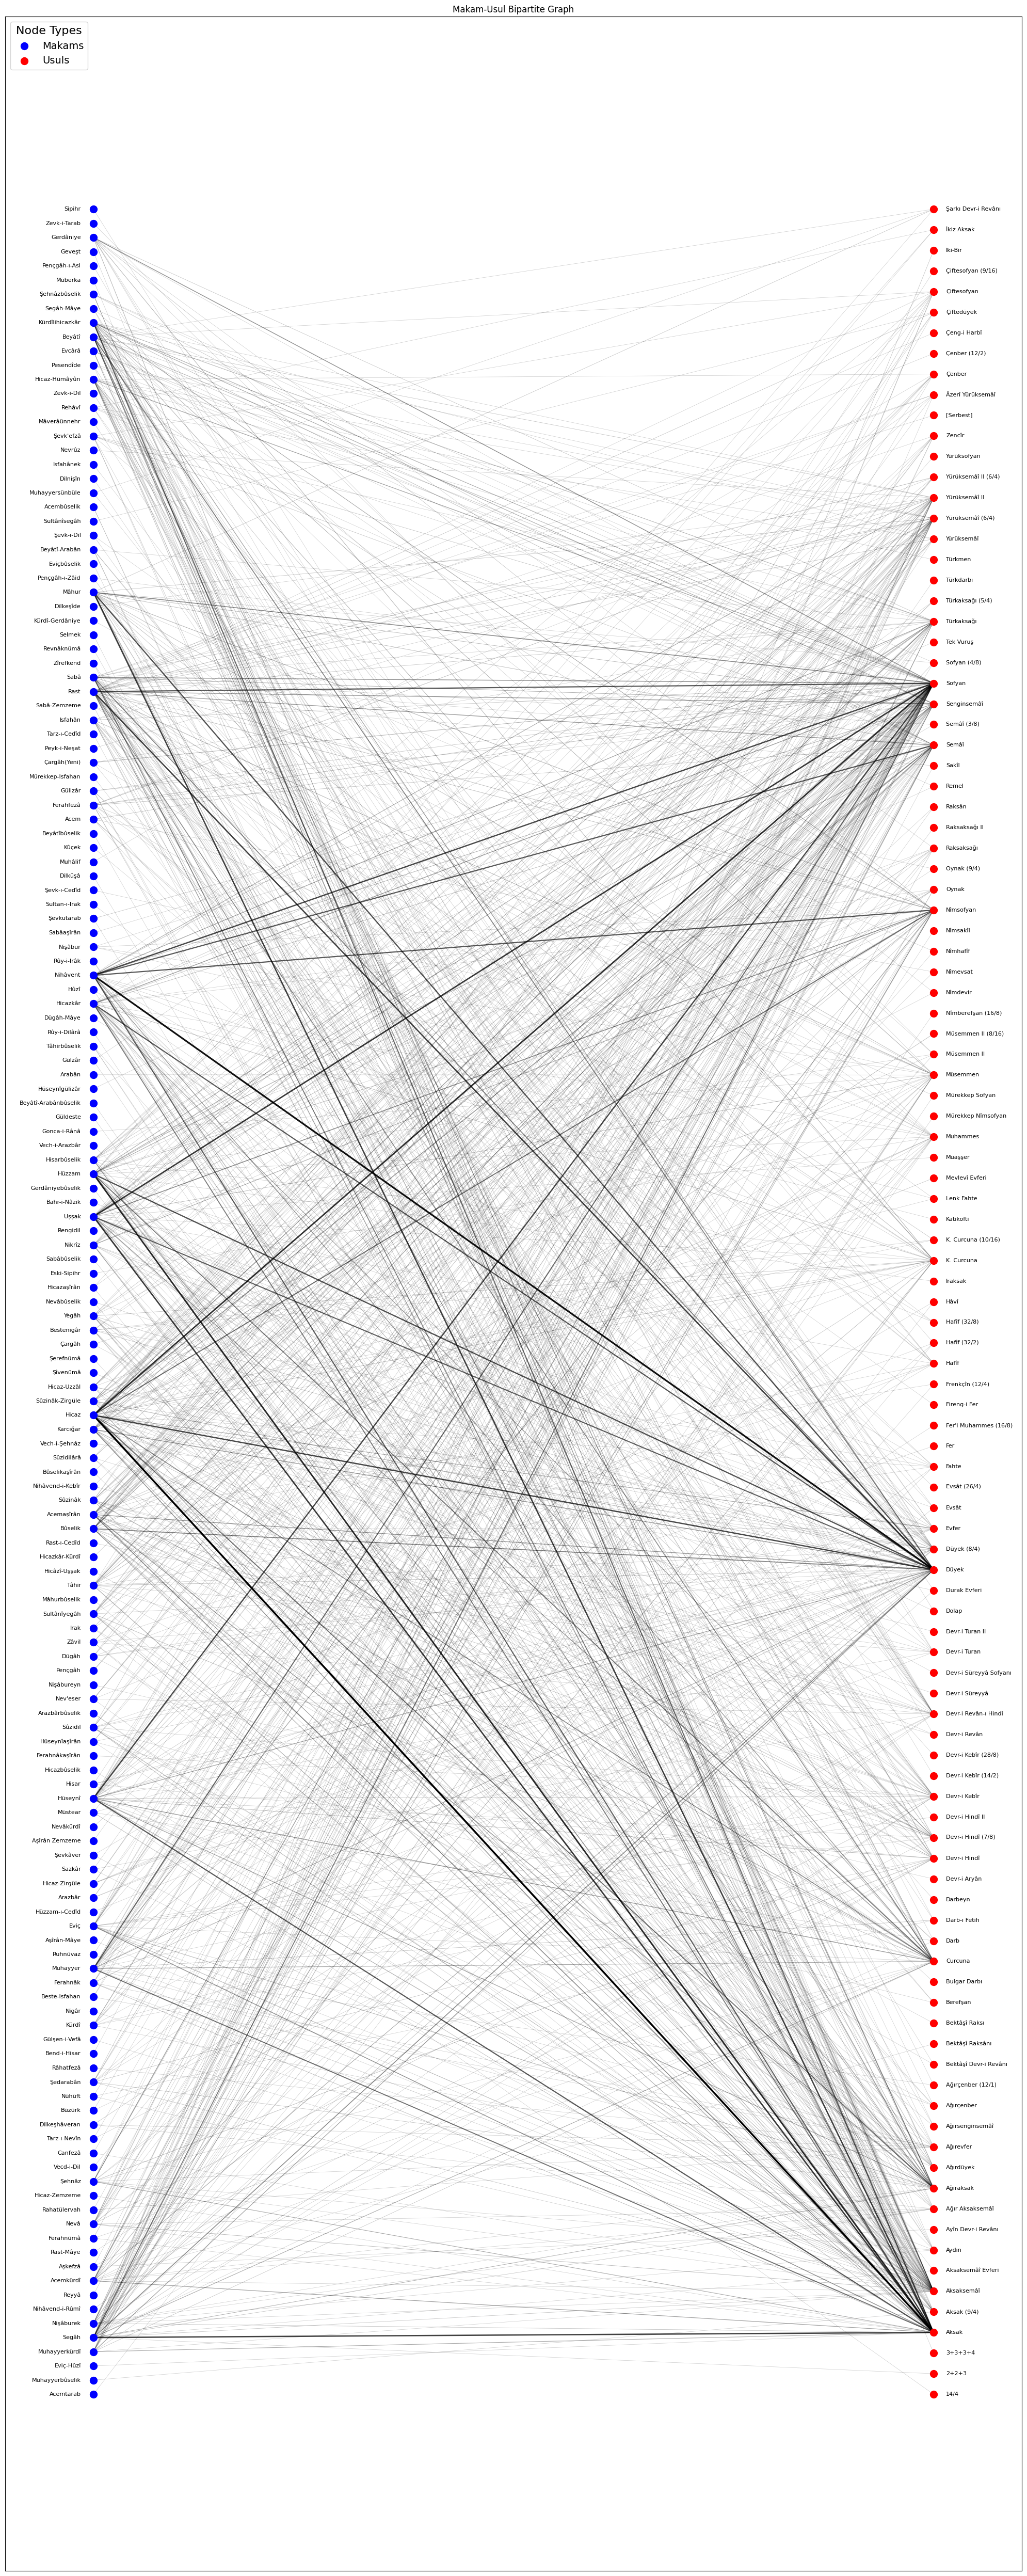

In [ ]:
G = generate_bipartite_graph(df)

plt.figure(figsize=(20, 50))

makams = set(df.index)
usuls = set()
for node in G.nodes():
    if node not in makams:
        usuls.add(node)

# Create lists from the sets
left_nodes = list(makams)
right_nodes = list(usuls)

# Generate positions with left_nodes as the first partition
pos = nx.bipartite_layout(G, nodes=left_nodes)

# Draw nodes with different colors for each partition
nx.draw_networkx_nodes(
    G,
    pos,
    nodelist=left_nodes,
    node_color="blue",
    node_size=100,
    label="Makams",
)
nx.draw_networkx_nodes(
    G,
    pos,
    nodelist=right_nodes,
    node_color="red",
    node_size=100,
    label="Usuls",
)
# Draw edges with colors based on weights
# Get all edge weights
weights = [d["weight"] for u, v, d in G.edges(data=True)]
min_weight = min(weights)
max_weight = max(weights)

# Create a colormap for the edges
# Use edge width and color transparency to represent weight
for u, v, d in G.edges(data=True):
    # Normalize weight between 0 and 1
    normalized_weight = (
        (d["weight"] - min_weight) / (max_weight - min_weight)
        if max_weight > min_weight
        else 0.5
    )
    # Use width proportional to weight (but limit max width for readability)
    width = 0.5 + 2 * normalized_weight
    # Use color transparency based on weight
    alpha = 0.2 + 0.8 * normalized_weight
    nx.draw_networkx_edges(
        G, pos, edgelist=[(u, v)], width=width, edge_color="black", alpha=alpha
    )

# Draw left-aligned labels (Makams)
left_pos = {node: (pos[node][0] - 0.025, pos[node][1]) for node in left_nodes}
nx.draw_networkx_labels(
    G,
    left_pos,
    labels={
        node: node for node in left_nodes
    },  # Ensure we only label left nodes
    font_size=8,
    horizontalalignment="right",  # Right-align text (toward node)
)

# Draw right-aligned labels (Usuls)
right_pos = {
    node: (pos[node][0] + 0.025, pos[node][1]) for node in right_nodes
}
nx.draw_networkx_labels(
    G,
    right_pos,
    labels={
        node: node for node in right_nodes
    },  # Ensure we only label right nodes
    font_size=8,
    horizontalalignment="left",  # Left-align text (toward node)
)

plt.title(
    G.graph["name"] if "name" in G.graph else "Makam-Usul Bipartite Network"
)
plt.tight_layout()
plt.legend(
    loc="upper left",
    fontsize=14,
    title="Node Types",
    title_fontsize="16",
)
plt.show()

## Frequent combination study 
Here we study the Makam-Usul pairs that happen at least 5 times in the data

<Figure size 1600x1200 with 0 Axes>

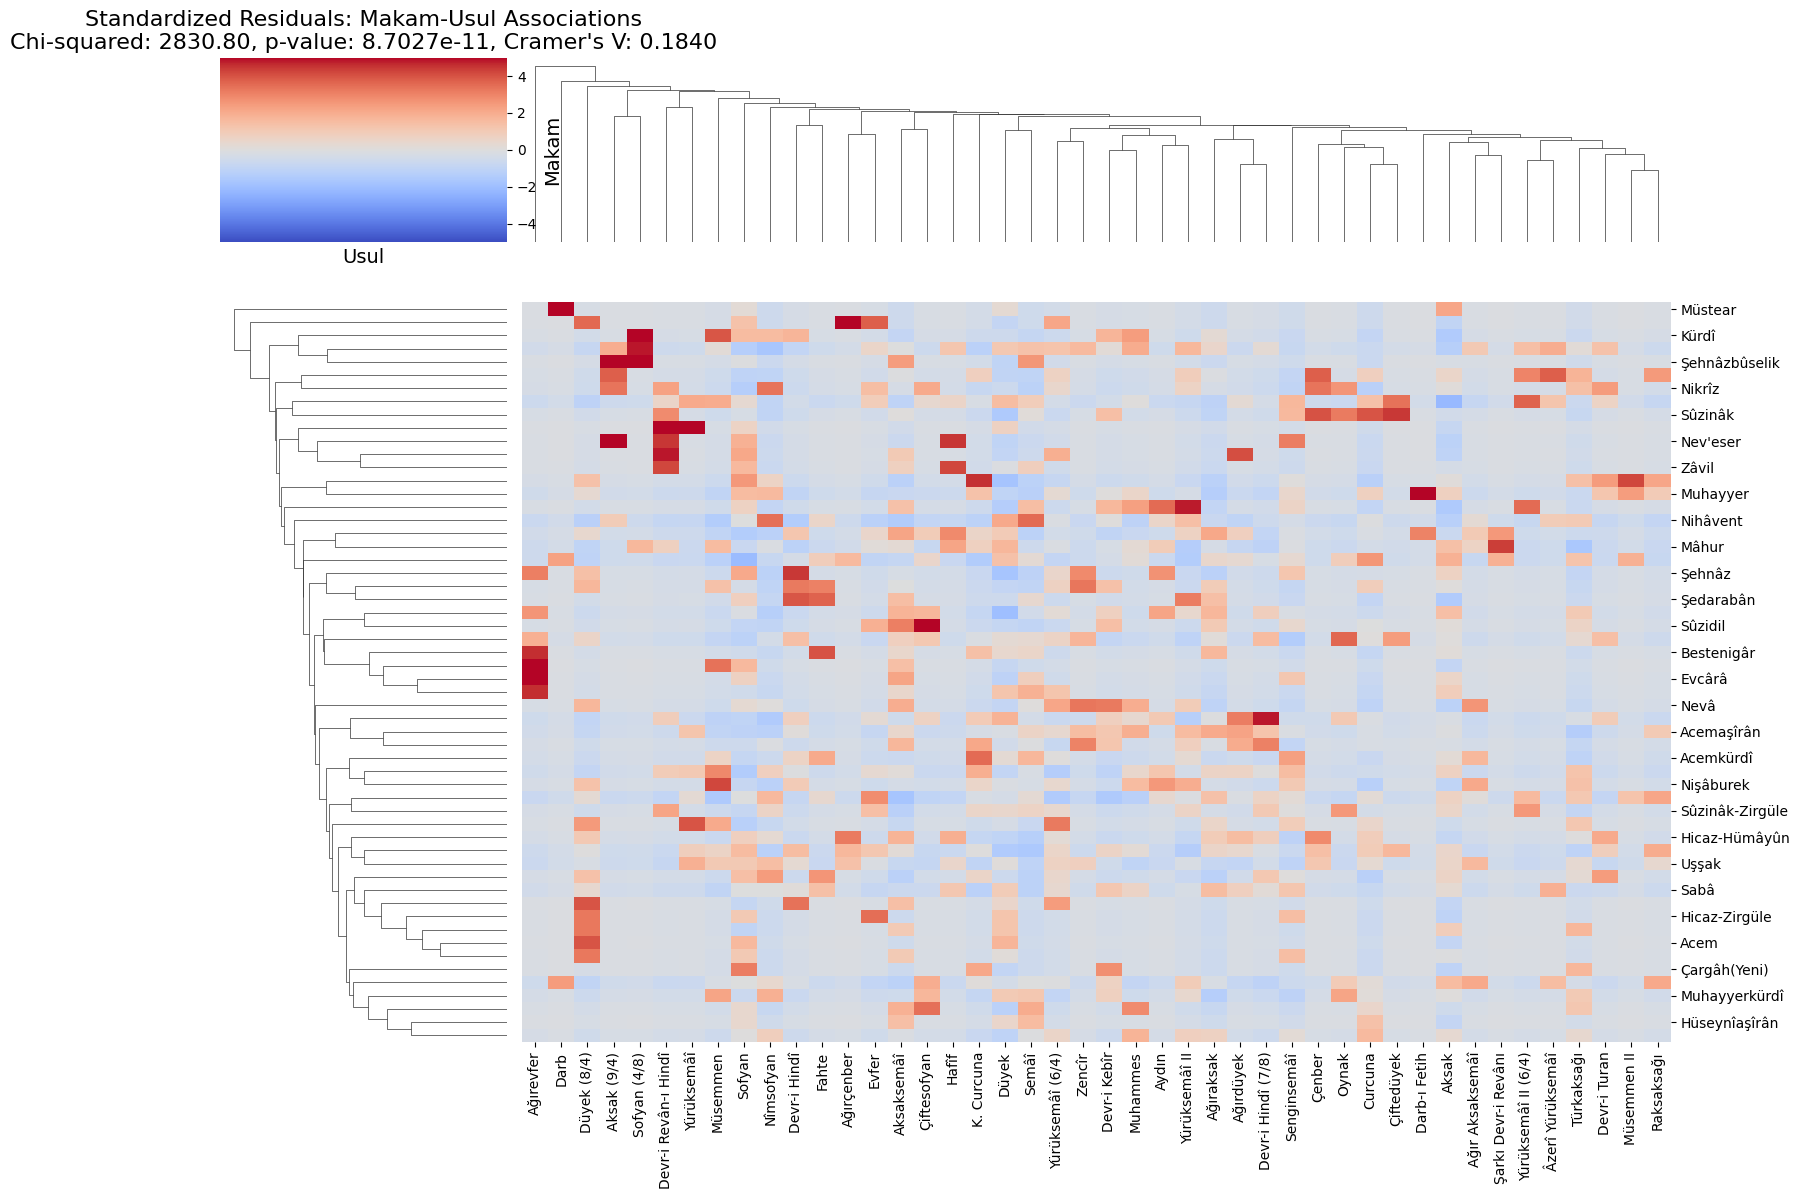

In [7]:
# Filter to include only makams and usuls with sufficient data if needed
total_ocurrence_threshold = 5

makam_row_sums = df.sum(axis=1)
usul_col_sums = df.sum(axis=0)

filtered_makams = makam_row_sums[
    makam_row_sums >= total_ocurrence_threshold
].index
filtered_usuls = usul_col_sums[
    usul_col_sums >= total_ocurrence_threshold
].index

# Create a filtered contingency table
contingency_table = df.loc[filtered_makams, filtered_usuls]

# Perform chi-squared test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Calculate Cramer's V to measure association strength
n = contingency_table.sum().sum()
phi2 = chi2 / n
r, k = contingency_table.shape
phi_coef = np.sqrt(phi2 / min(k - 1, r - 1))

# Calculate standardized residuals to identify specific associations
observed = contingency_table.values
residuals = (observed - expected) / np.sqrt(expected)
std_residuals = pd.DataFrame(
    residuals, index=contingency_table.index, columns=contingency_table.columns
)

# Plot the standardized residuals as a heatmap
plt.figure(figsize=(16, 12))
mask = std_residuals == 0  # Mask cells with zero residuals (no occurrences)
sns.clustermap(
    std_residuals,
    cmap="coolwarm",
    center=0,
    row_cluster=True,
    col_cluster=True,
    figsize=(16, 12),
    annot=False,
    mask=mask,
    vmin=-5,
    vmax=5,
)  # Limiting the color scale
plt.title(
    "Standardized Residuals: Makam-Usul Associations\n"
    + f"Chi-squared: {chi2:.2f}, p-value: {p:.4e}, Cramer's V: {phi_coef:.4f}",
    fontsize=16,
)
plt.xlabel("Usul", fontsize=14)
plt.ylabel("Makam", fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()

In [8]:
# Find the top 15 strongest positive associations
flat_residuals = std_residuals.stack().sort_values(ascending=False)
top_associations = flat_residuals.head(15).reset_index()
top_associations.columns = ["Makam", "Usul", "Standardized Residual"]
print("Top 15 strongest positive Makam-Usul associations:")
print(top_associations)

# Find the top 15 strongest negative associations (avoidances)
bottom_associations = flat_residuals.tail(15).reset_index()
bottom_associations.columns = ["Makam", "Usul", "Standardized Residual"]
print("\nTop 15 strongest negative Makam-Usul associations (avoidances):")
print(bottom_associations)

Top 15 strongest positive Makam-Usul associations:
            Makam                  Usul  Standardized Residual
0         Müstear                  Darb              10.298777
1           Dügâh            Ağırçenber               7.927721
2            Irak             Ağırevfer               7.320480
3          Rehâvî            Yürüksemâî               6.829756
4   Şehnâzbûselik          Sofyan (4/8)               6.829756
5          Rehâvî  Devr-i Revân-ı Hindî               6.498243
6        Nev'eser           Aksak (9/4)               6.208503
7   Şehnâzbûselik           Aksak (9/4)               6.208503
8        Muhayyer          Darb-ı Fetih               6.104195
9         Sûzidil           Çiftesofyan               5.419241
10         Evcârâ             Ağırevfer               5.376375
11          Kürdî          Sofyan (4/8)               5.081506
12        Bûselik          Sofyan (4/8)               4.841981
13     Sûzidilârâ  Devr-i Revân-ı Hindî               4.826938
14  

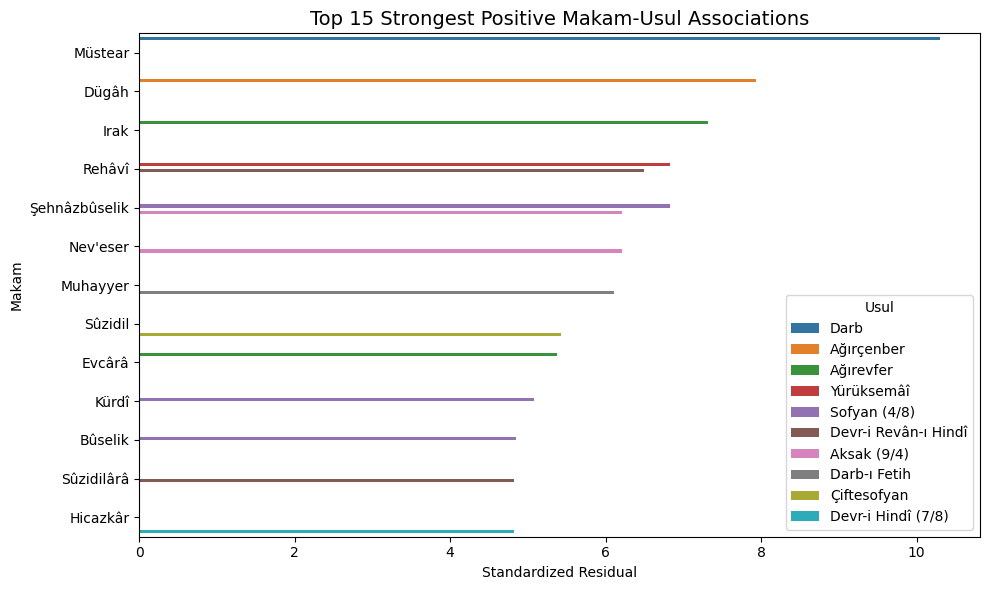

In [9]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x="Standardized Residual", y="Makam", hue="Usul", data=top_associations
)
plt.title("Top 15 Strongest Positive Makam-Usul Associations", fontsize=14)
plt.tight_layout()
plt.show()

## Rare combinations study 
Here we study the Makam-Usul pairs that happen at less than 5 times in the data

In [ ]:
# TODO